In [ ]:
import pandas as pd
import numpy as np
from pycaret.regression import * 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
data_house = pd.read_csv('190623_rumahcom_tangsel_city_unfiltered.csv', encoding='cp1252')

In [ ]:
data_house.info()

In [ ]:
data_house.isnull().sum()

In [ ]:
data_house[['bed', 'bath']].describe()


In [ ]:
data_house.head()

In [ ]:
def categorize_price(price):
    if 'M' in price:
        return 'M'
    elif 'jt' in price:
        return 'jt'
    else:
        return 'Other'

data_house['price_feature'] = data_house['price'].apply(categorize_price)

count = data_house['price_feature'].value_counts()
print(count)

# menghapus other karena termasuk membingungkan

In [ ]:
# 1. Tentukan kategori harga
def categorize_price(harga):
    if 'M' in harga:
        return 'M'
    elif 'jt' in harga:
        return 'jt'
    else:
        return 'Other'

# 2. Tambahkan kolom baru dengan kategori harga
data_house['price_feature'] = data_house['price'].apply(categorize_price)

# 3. Hapus data yang termasuk kategori 'Other'
data_house_cleaned = data_house[data_house['price_feature'] != 'Other']

# 4. Lihat jumlah data setelah 'Other' dihapus
print(data_house_cleaned['price_feature'].value_counts())
print(data_house_cleaned.shape)


In [ ]:
data_house_cleaned.head()

In [ ]:
data_house_cleaned.isnull().sum()

In [ ]:
data_house_cleaned.info()

In [ ]:
# Plot histograms to visualize the distribution of 'bed' and 'bath'
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot for 'bed'
plt.subplot(1, 2, 1)
plt.hist(data_house['bed'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Bed Count')
plt.xlabel('Number of Beds')
plt.ylabel('Frequency')

# Plot for 'bath'
plt.subplot(1, 2, 2)
plt.hist(data_house['bath'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Bath Count')
plt.xlabel('Number of Baths')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Menghitung mean untuk kolom 'bed' dan 'bath'
bed_mean = data_house_cleaned['bed'].mean()
bath_mean = data_house_cleaned['bath'].mean()
listing_floorarea_2 = data_house_cleaned['listing-floorarea 2'].mode()[0]

# Imputasi nilai yang hilang pada kolom 'bed', 'bath', dan 'listing-floorarea 2' menggunakan mean/mode
data_house_cleaned['bed'].fillna(bed_mean, inplace=True)
data_house_cleaned['bath'].fillna(bath_mean, inplace=True)
data_house_cleaned['listing-floorarea 2'].fillna(listing_floorarea_2, inplace=True)

# Verifikasi bahwa tidak ada nilai NaN yang tersisa di kolom 'bed', 'bath', dan 'listing-floorarea 2'
null_counts_after_imputation = data_house_cleaned[['bed', 'bath', 'listing-floorarea 2']].isnull().sum()
null_counts_after_imputation


In [ ]:
data_house_cleaned.isnull().sum()

In [ ]:
data_house_cleaned.head()

In [ ]:
# Menyimpan DataFrame ke file CSV
data_house_cleaned.to_csv('data_house_cleaned.csv', index=False)


In [ ]:
data_house_cleaned.info()

In [ ]:
data_house_cleaned.head()

mengubah string menjadi numerik (price, listing-floorarea dan listing-floorarea 2)

In [ ]:
import pandas as pd
import re


# Fungsi untuk mengonversi harga dari string menjadi angka float
def konversi_harga(harga_str):
    harga_str = str(harga_str)  # Pastikan harga_str adalah string
    
    # Jika ada rentang harga, ambil nilai pertama
    if '-' in harga_str:
        harga_str = harga_str.split('-')[0].strip()
    
    # Hapus simbol Rp jika ada
    harga_str = harga_str.replace('Rp', '').strip()
    
    # Jika ada 'M' (Milyar), kalikan dengan 1 milyar
    if 'M' in harga_str:
        return float(harga_str.replace('M', '').replace('.', '').replace(',', '.')) * 1_000_000_000
    
    # Jika ada 'jt' (ratusan juta), kalikan dengan 1 juta
    if 'jt' in harga_str:
        return float(harga_str.replace('jt', '').replace('.', '').replace(',', '.')) * 1_000_000
    
    # Hapus titik sebagai pemisah ribuan, ganti koma dengan titik sebagai desimal
    harga_str = harga_str.replace('.', '').replace(',', '.')
    
   

# Fungsi untuk mengonversi luas lantai dari string menjadi angka integer
def konversi_luas_lantai(area_str):
    # Hapus satuan m² dan konversi ke integer
    return int(re.sub(r'\D', '', area_str))

# Fungsi untuk mengonversi harga per m² dari string menjadi angka integer
def konversi_harga_per_m2(harga_per_m2_str):
    # Hapus simbol Rp dan satuan, lalu konversi ke integer
    return int(re.sub(r'\D', '', harga_per_m2_str))

# Terapkan fungsi pada kolom 'price', 'listing-floorarea', dan 'listing-floorarea 2'
data_house_cleaned['price'] = data_house_cleaned['price'].apply(konversi_harga)
data_house_cleaned['listing-floorarea'] = data_house_cleaned['listing-floorarea'].apply(konversi_luas_lantai)
data_house_cleaned['listing-floorarea 2'] = data_house_cleaned['listing-floorarea 2'].apply(konversi_harga_per_m2)

# Menghapus kolom 'price_feature'
data_house_cleaned.drop(columns=['price_feature'], inplace=True)




In [ ]:
data_house_cleaned.head()

In [ ]:
# Menyimpan DataFrame ke file CSV
data_house_cleaned.to_csv('data_house_cleaned.csv', index=False)

In [ ]:
data_house_cleaned.info()

 # visualisi data

In [ ]:
data_house_cleaned.head()

# pergantian nama kolom karena mengandung karakter khusus - 

In [ ]:
# Mengganti nama kolom dengan mengganti spasi dan tanda hubung dengan underscore
data_house_cleaned.columns = data_house_cleaned.columns.str.replace(' ', '_').str.replace('-', '_')

# Lihat hasil perubahan nama kolom
print(data_house_cleaned.head())


In [1]:
import pandas as pd
import numpy as np
from pycaret.regression import * 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data_house_cleaned=pd.read_csv('data_house_cleaned.csv')

In [3]:
data_house_cleaned.head()

,listing-location,price,bed,bath,listing-floorarea,listing_floorarea_2,price_in_billion
0,"Gading Serpong, Tangerang Selatan, Banten",6.900000e+09,5.0,5.0,420,20.720721,6.90
1,"Gading Serpong, Tangerang Selatan, Banten",4.500000e+09,3.0,3.0,190,12.747875,4.50
2,"Gading Serpong, Tangerang Selatan, Banten",3.950000e+09,3.0,3.0,132,30.859375,3.95
3,"Gading Serpong, Tangerang Selatan, Banten",3.300000e+09,4.0,3.0,220,18.333333,3.30
4,"Gading Serpong, Tangerang Selatan, Banten",3.500000e+09,3.0,2.0,180,27.777778,3.50


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data_house_cleaned, explorative=True)
profile.to_widgets()

In [ ]:
import matplotlib.pyplot as plt

# Periksa distribusi data
print(data_house_cleaned['listing_floorarea 2'].describe())

# Filter out outliers (misalnya, nilai yang lebih besar dari quantile 95%)
filtered_data = data_house_cleaned[data_house_cleaned['listing_floorarea 2'] < data_house_cleaned['listing_floorarea 2'].quantile(0.95)]

# Scatterplot dari data yang telah difilter
plt.scatter(filtered_data['listing_floorarea'], filtered_data['listing_floorarea 2'])
plt.xlabel('Listing Floorarea')
plt.ylabel('Listing Floorarea 2')
plt.title('Scatterplot after filtering outliers')
plt.show()


# data modelling

persiapan

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load data
data = pd.read_csv('data_house_cleaned.csv')

spliting and training data

In [5]:
# Splitting the data into features and target
X = data.drop(columns=['price'])
y = data['price_in_billion']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing pipeline for numerical and categorical data
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

buld the model in pipline

In [6]:




# Building a pipeline for each model
models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('model', LinearRegression())]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),
                                     ('model', RandomForestRegressor(random_state=42))]),
    'Gradient Boosting': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('model', GradientBoostingRegressor(random_state=42))])
}

# Training and evaluating each model
best_model = None
best_score = -float('inf')

model_results = {}

for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    score = r2_score(y_test, y_pred)
    model_results[name] = score
    
    if score > best_score:
        best_score = score
        best_model = pipeline

best_model_name = best_model.named_steps["model"]
best_model_name, best_score, model_results


(LinearRegression(),
 0.9999999998101582,
 {'Linear Regression': 0.9999999998101582,
  'Random Forest': 0.8616249551740458,
  'Gradient Boosting': 0.9698561126968533})

In [11]:
# Mengambil model Gradient Boosting dari pipeline
gradient_boosting_model = models['Gradient Boosting'].named_steps['model']

# Menampilkan model Gradient Boosting
print(gradient_boosting_model)


GradientBoostingRegressor(random_state=42)


In [34]:
data.head()

,listing-location,price,bed,bath,listing-floorarea,listing_floorarea_2,price_in_billion
0,"Gading Serpong, Tangerang Selatan, Banten",6.900000e+09,5.0,5.0,420,20.720721,6.90
1,"Gading Serpong, Tangerang Selatan, Banten",4.500000e+09,3.0,3.0,190,12.747875,4.50
2,"Gading Serpong, Tangerang Selatan, Banten",3.950000e+09,3.0,3.0,132,30.859375,3.95
3,"Gading Serpong, Tangerang Selatan, Banten",3.300000e+09,4.0,3.0,220,18.333333,3.30
4,"Gading Serpong, Tangerang Selatan, Banten",3.500000e+09,3.0,2.0,180,27.777778,3.50


In [35]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
# Splitting the data into features and target
X = data.drop(columns=['price','listing-location'])
y = data['price_in_billion']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing pipeline for numerical and categorical data
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [36]:
from sklearn.model_selection import GridSearchCV

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=gradient_boosting_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='r2', 
                           n_jobs=-1, 
                           verbose=2)

# Melakukan fitting pada data pelatihan
grid_search.fit(X_train, y_train)

# Mendapatkan parameter terbaik dan hasil tuning
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

# Menggunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R² Score on Test Data: {r2}')


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
Best R2 Score: 0.9029236819004598
R² Score on Test Data: 0.9786763219979729


# Visualisasi Model

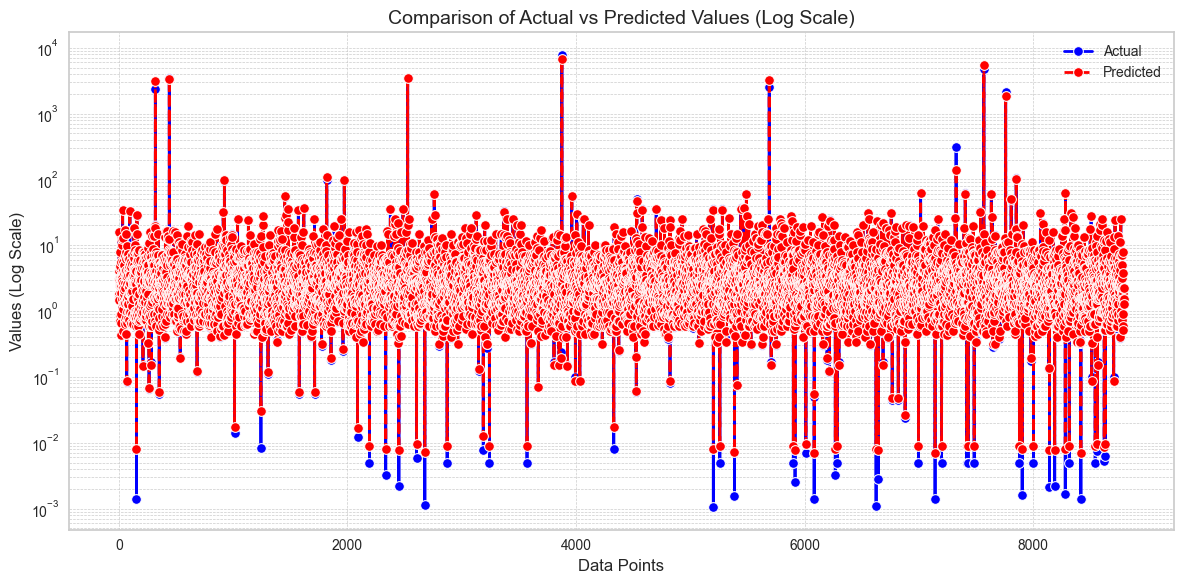

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Misalkan y_test adalah nilai aktual dan y_pred adalah prediksi dari model# y_test dan y_pred adalah array atau list dari nilai-nilai tersebut# Mengatur ukuran figure lebih kecil
plt.figure(figsize=(12, 6))

# Membuat garis untuk nilai aktual
sns.lineplot(x=np.arange(len(y_test)), y=y_test, marker='o', label='Actual', color='blue', linewidth=2)

# Membuat garis untuk nilai prediksi
sns.lineplot(x=np.arange(len(y_pred)), y=y_pred, marker='o', label='Predicted', color='red', linestyle='--', linewidth=2)

# Menggunakan skala logaritmik pada sumbu Y
plt.yscale('log')

# Menambahkan grid untuk kemudahan membaca
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Menambahkan judul dan label sumbu
plt.title('Comparison of Actual vs Predicted Values (Log Scale)', fontsize=14)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('Values (Log Scale)', fontsize=12)

# Menambahkan legenda di posisi yang terbaik
plt.legend(loc='best', fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()


bisa kita lihat disini bahwa model gradien boosting yang telah dibuat sudah bisa memprediksi hail dari data actual yang sebenarnya 

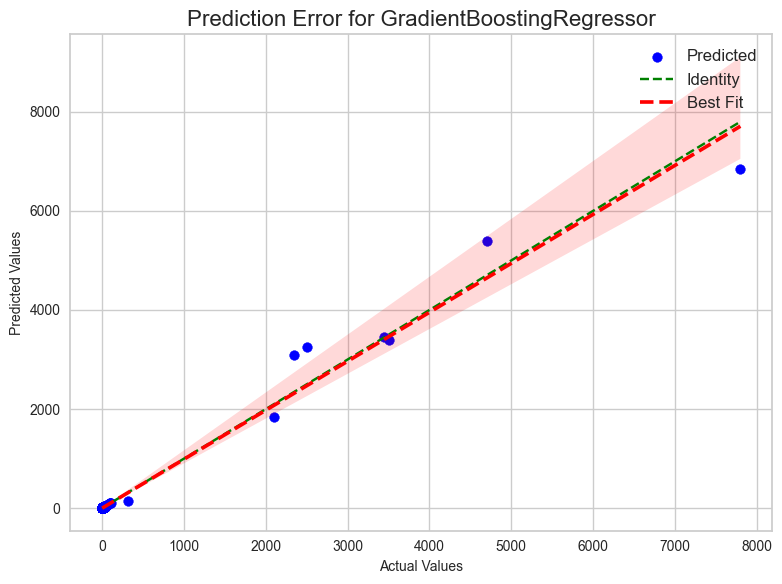

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Misalkan y_test adalah nilai aktual dan y_pred adalah prediksi dari model# Anda dapat menggunakan data y_test dan y_pred yang sudah ada# Mengatur ukuran figure
plt.figure(figsize=(8, 6))

# Membuat scatter plot untuk nilai aktual vs nilai prediksi
plt.scatter(y_test, y_pred, color='blue', label='Predicted')

# Menambahkan garis identitas (y = x) sebagai referensi
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--', label='Identity')

# Menambahkan garis best fit (regresi linear) ke plot
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', line_kws={'linestyle':'--'}, label='Best Fit')

# Menambahkan judul dan label sumbu
plt.title('Prediction Error for GradientBoostingRegressor', fontsize=16)
plt.xlabel('Actual Values', fontsize=10)
plt.ylabel('Predicted Values', fontsize=10)

# Menambahkan legenda
plt.legend(loc='best', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


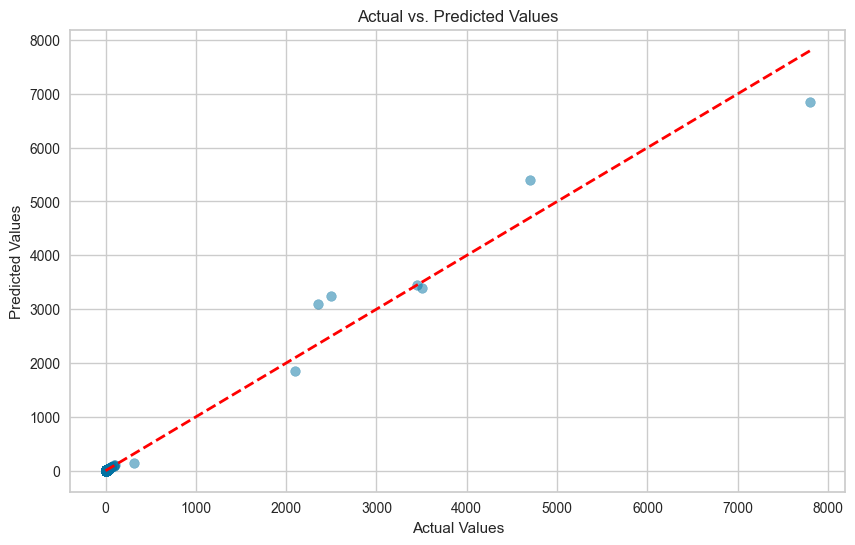

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


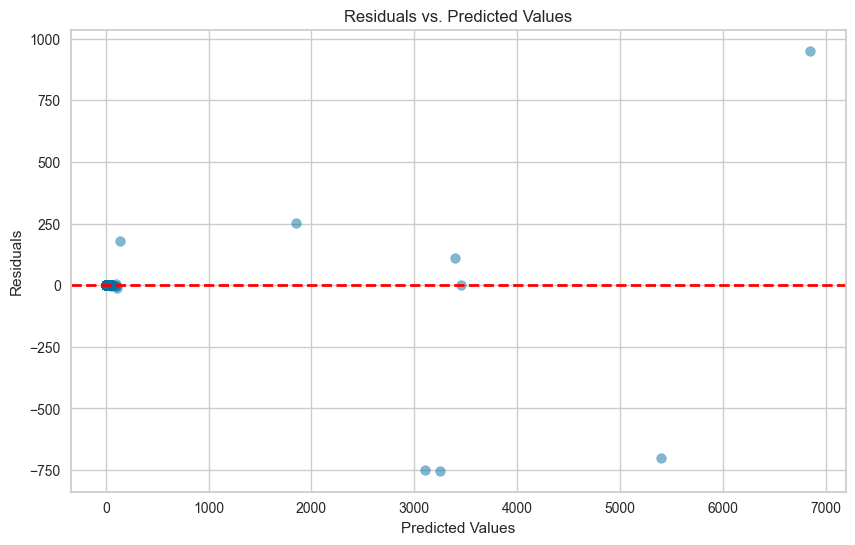

In [40]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid(True)
plt.show()


menyimpan model

In [41]:
import joblib

# Simpan model terbaik yang dihasilkan oleh GridSearchCV
joblib.dump(grid_search.best_estimator_, 'price_house_GridSearch')


['price_house_GridSearch']

In [42]:
# Muat model yang telah disimpan
loaded_model = joblib.load('price_house_GridSearch')

# Gunakan model yang sudah dimuat untuk prediksi
y_pred = loaded_model.predict(X_test)


In [48]:
print(y_pred[:10])

[ 1.80508058  1.60370879 15.98406899  4.10193991  3.09589124  1.49768973
  2.66484438  0.88538652  0.70322033  4.50539215]


In [49]:
y_test.head(10)

23568     1.800
10621     1.600
2201     16.000
1433      4.100
4120      3.100
15828     1.490
19125     2.660
10168     0.862
1246      0.700
22169     4.500
Name: price_in_billion, dtype: float64